In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os,shutil
#from tqdm import tqdm
import random

%matplotlib inline


# Any results you write to the current directory are saved as output.

In [2]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(96,96, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 512)        

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import random
import cv2
from PIL import Image

In [5]:
data = []
labels = []

parasitized = os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized")
uninfected = os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected")

parasitized.remove("Thumbs.db")
uninfected.remove("Thumbs.db")

for u in uninfected:
    image = Image.open("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/" + u)
    image = image.resize((96,96))
    image = img_to_array(image)
    data.append(image)
    labels.append(0)

for p in parasitized:
    image = Image.open("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/" + p)
    image = image.resize((96,96))
    image = img_to_array(image)
    data.append(image)
    labels.append(1)


In [6]:
data = np.array(data)
labels = np.array(labels)

In [7]:
n = np.arange(data.shape[0])
np.random.shuffle(n)
data = data[n]
labels = labels[n]

In [8]:
data = data.astype(np.float32)
#labels = labels.astype(np.int32)
data = data/255.0

In [9]:
train_x, x, train_y, y = train_test_split(data, labels, test_size = 0.2, random_state = 42)

val_x, test_x, val_y , test_y = train_test_split(x, y , test_size = 0.5, random_state = 42)

In [10]:
print("Number of trainig examples:",train_x.shape[0])
print("Number of validation examples:",val_x.shape[0])
print("Number of test examples:",test_x.shape[0])

Number of trainig examples: 22046
Number of validation examples: 2756
Number of test examples: 2756


In [11]:
aug = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
                        zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [12]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
callbacks_list = [ EarlyStopping(monitor='val_accuracy', patience = 20, min_delta = 1,verbose = 1),
                   ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=15,verbose = 1)]

In [13]:
opt = Adam(lr = 1e-3)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [14]:
history = model.fit_generator(aug.flow(train_x,train_y, batch_size = 32) ,steps_per_epoch = len(train_x)//32 ,
                              validation_data = (val_x,val_y), callbacks = callbacks_list, epochs = 60  )

Epoch 1/60
688/688 [==============================] - 56s 81ms/step - loss: 0.6931 - accuracy: 0.5141 - val_loss: 0.6923 - val_accuracy: 0.5265
Epoch 2/60
688/688 [==============================] - 51s 75ms/step - loss: 0.6918 - accuracy: 0.5190 - val_loss: 0.6814 - val_accuracy: 0.5671
Epoch 3/60
688/688 [==============================] - 51s 74ms/step - loss: 0.4454 - accuracy: 0.7678 - val_loss: 0.1972 - val_accuracy: 0.9430
Epoch 4/60
688/688 [==============================] - 50s 73ms/step - loss: 0.2320 - accuracy: 0.9226 - val_loss: 0.1766 - val_accuracy: 0.9383
Epoch 5/60
688/688 [==============================] - 51s 74ms/step - loss: 0.2174 - accuracy: 0.9282 - val_loss: 0.1669 - val_accuracy: 0.9459
Epoch 6/60
688/688 [==============================] - 51s 75ms/step - loss: 0.2072 - accuracy: 0.9303 - val_loss: 0.1534 - val_accuracy: 0.9536
Epoch 7/60
688/688 [==============================] - 51s 74ms/step - loss: 0.1971 - accuracy: 0.9316 - val_loss: 0.1501 - val_accuracy:

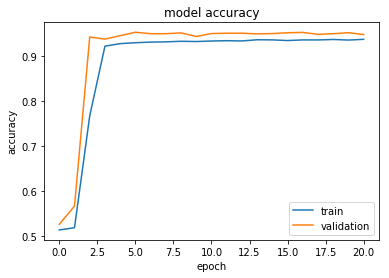

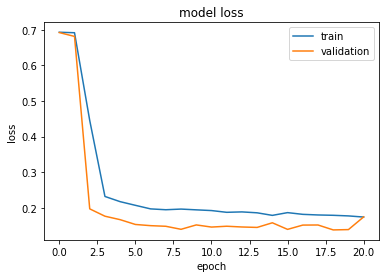

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [16]:
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Test Accuracy: %.3f' % (test_acc))

Test Accuracy: 0.952


In [17]:
model.save('my_model.h5')